# In this notebook i tried to cover basic implementation of Tensorflow with Hidden layers. So I hope you guys like it. Upvote this kernel.  
## In this notebook you will learn following:
1. Basic importing and data preprocessing for Deep learning
2.  Creating Variables such as variable for weight (w) and bias (b)
3.  Hidden layers creation
4.  Implementation of mini batch for training 
5. Testing accuracy

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))

['train.csv', 'sample_submission.csv', 'test.csv']


## 1. Importing files 

In [2]:
# Importing CSV files as this step you all knows  
train=pd.read_csv('../input/train.csv')
test=pd.read_csv('../input/test.csv')

In [3]:
# Checking dataframe shape
train.shape , test.shape

((42000, 785), (28000, 784))

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Since 1st column of dataframe train gives label detail. So lets extract that label column

In [5]:
# Extracting label from train dataframe
train_label=train.iloc[:,0]

### For further use we need to convert our train_label dataframe to Hot - Encode 

In [6]:
#converting dataframe to category for hot encode
train_label=train_label.astype('category')

In [7]:
# Converted into Hot encode
train_label=pd.get_dummies(train_label)
train_label.shape

(42000, 10)

In [8]:
del train['label']

## Now Lets start import tensorflow

In [9]:
# importing Tensorflow
import tensorflow as tf

## Now create variable with initializer along with their shape and make your logit with equation
## (input * weight)+bias


In [10]:
def variable(x,weight_shape,bias_shape):
    weight_init=tf.truncated_normal_initializer(stddev=0.1)
    bias_init=tf.constant_initializer(0.1)
    weight=tf.get_variable(shape=weight_shape,name='weight',initializer=weight_init)
    bias=tf.get_variable(shape=bias_shape,name='bias',initializer=bias_init)
    output= tf.add(tf.matmul(x,weight),bias)
    return output

## Now placeholder which is use to initialize once when graph is run. Basically placeholder is use for giving input to NeuralNet

In [11]:
x=tf.placeholder(tf.float32,name='x',shape=[None,784])
y=tf.placeholder(tf.float32,name='y',shape=[None,10])
drop=tf.placeholder(tf.float32)

## We are going to make a Neural Network with 3 Hidden layer . 1st Hidden layer consist of 512 neurons then 2nd hidden layer of 256 neurons then last hidden layer of 128 neurons which ultimately gives final output with 10 softmax layer neurons

![](https://assets.digitalocean.com/articles/handwriting_tensorflow_python3/cnwitLM.png)

In [12]:
with tf.variable_scope('layer_1'):
    hidden_1=variable(x,[784,512],[512])
with tf.variable_scope('layer_2'):
    hidden_2=variable(hidden_1,[512,256],[256])
with tf.variable_scope('layer_3'):
    hidden_3=variable(hidden_2,[256,128],[128])
    out1=tf.nn.dropout(hidden_3,drop)   # To prevent from Overfitting
with tf.variable_scope('outputlayer'):
    output=variable(out1,[128,10],[10])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## Now defining Loss function for gradientDescent optimizer for getting optimal value of logit variables

In [13]:
# Defining cost function which will be used  by gradient descent
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=output))   

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



## Using AdamOptimizer to minimize cross entropy. You can also use GradientDescentOptimizer inplace of AdamOptimizer

In [14]:
# Graident Descent for minimize cross entropy
optimize=tf.train.AdamOptimizer(learning_rate=0.001)
step=optimize.minimize(cross_entropy)


## Checking accuracy with foloowing

In [15]:
correct_pred=tf.equal(tf.argmax(output,1),tf.argmax(y,1))
accuracy=tf.reduce_mean(tf.cast(correct_pred,tf.float32))

In [16]:
# Initialization of all variables
init=tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [17]:
train.shape, test.shape

((42000, 784), (28000, 784))

In [18]:
# Creating Session for all computation 
sess=tf.Session()

In [19]:
#Initialize variables
sess.run(init)

## Converting Dataframe into ndarray

In [20]:
train=train.values
train_label=train_label.values

In [21]:
# Some useful parameters for minibatch creation and gradient descent optimization 
iteration=2000
batch_size=256

## Below we are going to divide data into Mini batches and Iterate over many times to get global minimum cost

In [22]:
for i in range(iteration):
    choice=np.random.choice(42000,size=batch_size)
    x_train=train[choice]
    y_train=train_label[choice]
    sess.run(step,feed_dict={x:x_train,y:y_train,drop:0.4})

    if (i%100==0):
        loss,accu=sess.run([cross_entropy,accuracy],feed_dict={x:x_train,y:y_train,drop:1})
        print ('loss is',str(loss),'accuracy is',str(accu),'iteration',i+1)

loss is 517.5259 accuracy is 0.328125 iteration 1
loss is 31.689373 accuracy is 0.92578125 iteration 101
loss is 44.92915 accuracy is 0.890625 iteration 201
loss is 30.383446 accuracy is 0.8984375 iteration 301
loss is 15.208342 accuracy is 0.9296875 iteration 401
loss is 12.333823 accuracy is 0.92578125 iteration 501
loss is 10.011752 accuracy is 0.93359375 iteration 601
loss is 8.686537 accuracy is 0.88671875 iteration 701
loss is 4.700081 accuracy is 0.93359375 iteration 801
loss is 3.2749977 accuracy is 0.921875 iteration 901
loss is 2.50672 accuracy is 0.91796875 iteration 1001
loss is 2.3945506 accuracy is 0.921875 iteration 1101
loss is 2.1028337 accuracy is 0.91015625 iteration 1201
loss is 1.0734905 accuracy is 0.90625 iteration 1301
loss is 0.86055815 accuracy is 0.91796875 iteration 1401
loss is 1.4786451 accuracy is 0.87890625 iteration 1501
loss is 0.3276127 accuracy is 0.9296875 iteration 1601
loss is 0.57880515 accuracy is 0.91796875 iteration 1701
loss is 0.76069254 acc

# Now after training our model let's check it's accuracy

In [23]:
# Test dataset shape
test.shape

(28000, 784)

In [24]:
# Convert to arrays
test_array=test.values

## Now start session for prediction

In [25]:
result=sess.run(output,feed_dict={x:test_array,drop:1})

In [26]:
result=np.argmax(result,axis=1)

In [27]:
final=pd.DataFrame({'Predicted':result})
final.head()

,Predicted
0,2
1,0
2,9
3,9
4,3


## Lets check for first 3 prediction made by model

In [28]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, '2')

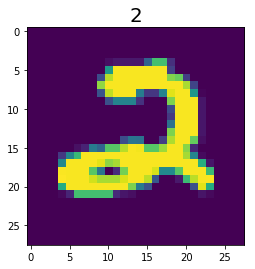

In [29]:
arr=test_array[0:5]
i=0
plt.imshow(arr[i].reshape([28,28]))
plt.title(final.iloc[0,0],size=20)

Text(0.5, 1.0, '0')

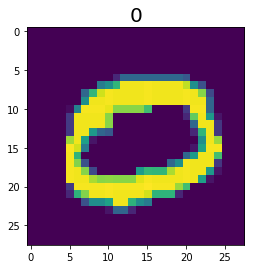

In [30]:
arr=test_array[0:5]
i=1
plt.imshow(arr[i].reshape([28,28]))
plt.title(final.iloc[1,0],size=20)

Text(0.5, 1.0, '9')

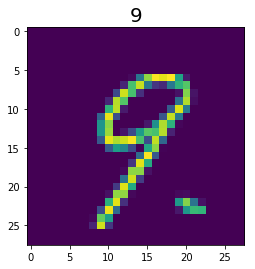

In [31]:
arr=test_array[0:5]
i=2
plt.imshow(arr[i].reshape([28,28]))
plt.title(final.iloc[2,0],size=20)

# So our model performed well. 

# Thanks. :) Happy learning